# Optical Character Recognition 

### OCR - recognizes text inside images such as scanned documents and photos. 

In [29]:
import pytesseract
import cv2
import matplotlib.pyplot as plt
import glob
import numpy as np 
from pytesseract import Output

%matplotlib inline 
pytesseract.pytesseract.tesseract_cmd = r"C:\\Program Files\\Tesseract-OCR\\tesseract.exe"

In [30]:

import cv2
import numpy as np

img = cv2.imread('image.jpg')

# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image, low=0, high=255):
    return cv2.threshold(image, low, high, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 
def show(img):
    plt.imshow(img, cmap="gray")
    plt.show()



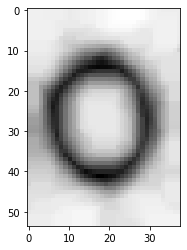

Text:  


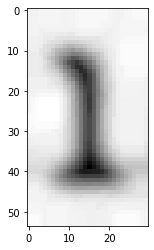

Text:  1 


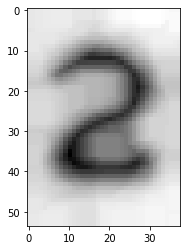

Text:  2 


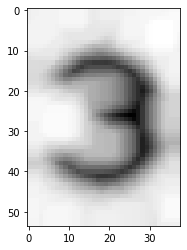

Text:  3 


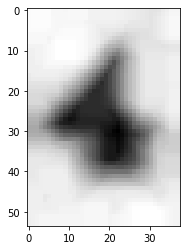

Text:  4 


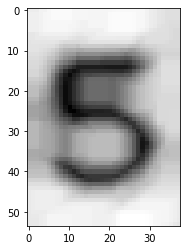

Text:  5 


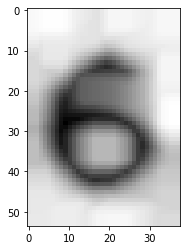

Text:  6 


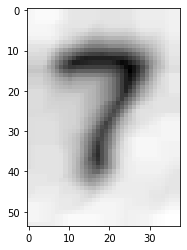

Text:  7 


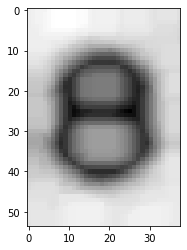

Text:  


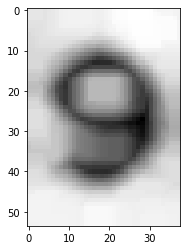

Text:  


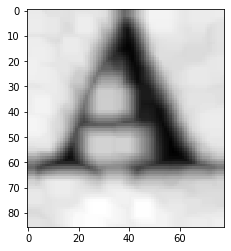

Text:  


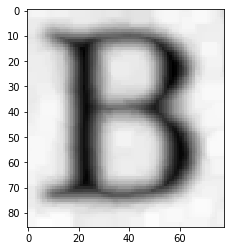

Text:  


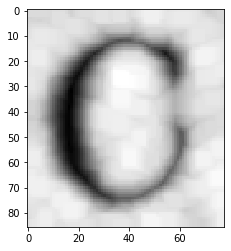

Text:  C 


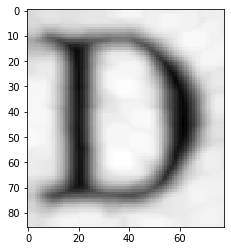

Text:  D 


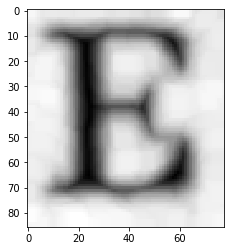

Text:  


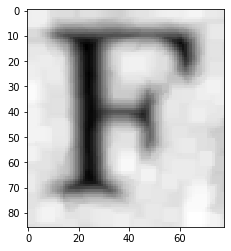

Text:  F 


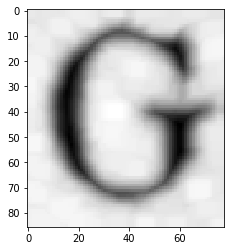

Text:  G 


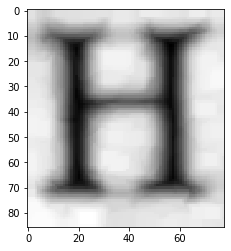

Text:  H 


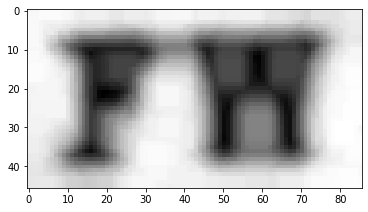

Text:  F 


In [80]:
synth_1963 = "E:\\viNet_RnD\Datasets\Fed\series year\\1963"
data = "E:\\viNet_RnD\Datasets\Fed\samples"

images = glob.glob(data + "\\*.png")


for image in images:
    img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
    # img = cv2.resize(img, (1024, 1024))
    # img = thresholding(img, 100, 255)
    # img = opening(img)
    img = dilate(img)
    # img = canny(img)

    # char_set = 
    config_small_text = ('-l eng --oem 1 --psm 10 -c tessedit_char_whitelist="ABCDEFGH0123456789"')
    config_series_year = ('-l eng --oem 1 -c tessedit_char_whitelist="SERIES0123456789"')
    text = pytesseract.image_to_string(img, config=config_small_text)

    show(img)
    print("Text: ", text.replace('\n', " "))

